In [1]:
import Algorithmia
import scipy.io
import os
import numpy as np
import png
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50

C:\Users\User\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
def Standarize(arr):
    for i in range(len(arr)):
        a = arr[i]
        a = (a - np.mean(a, axis=0))/np.std(a, axis=0)
        arr[i] = a
    return arr

def Normalize(arr):
    for i in range(len(arr)):
        a = arr[i]
        a = (a - np.min(a))/(np.max(a) - np.min(a))
        arr[i] = a
    return arr

def Upload_File_Algorithmia(localDir, destDir, client):
    count = 0
    for image in os.listdir(localDir):
        client.file(destDir).putFile(localDir + '/' + image)
        count += 1
        if(count % 100 == 99):
            pinrt('first ' + str(count+1) + ' completed')
def Grey_To_Channels(arr, cn):
    arr = cv2.cvtColor(arr, cv2.COLOR_GRAY2RGB)
    return arr

In [24]:
model = ResNet50(weights="imagenet", include_top=False, pooling='avg')
eeg_features = []
for subject in os.listdir('./EEG_RawData'):
    if 'Movie' in subject:
        for clip in os.listdir('./EEG_RawData/' + subject):
            if 'Clip' in clip:
                mat = scipy.io.loadmat('./EEG_RawData/' + subject + '/' + clip)
                mat = mat['ThisEEG']
                mat = mat[:,-1600:]
                mat = Standarize(mat)
                mat *= 255
                mat = mat.astype("uint8")
                mat.resize(12996)
                mat = mat.reshape(114, 114)
                mat = cv2.resize(mat, (224,224))
                mat = Grey_To_Channels(mat, 3)
                mat = np.expand_dims(mat, axis=0)
                features = model.predict(mat)
                eeg_features.append(features)
        print(subject + " completed");
np.savez_compressed(file="./EEG_ResNet_Features.npz",
                    features=eeg_features)

C:\Users\User\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Movie_P01 completed
Movie_P02 completed
Movie_P03 completed
Movie_P04 completed
Movie_P05 completed
Movie_P06 completed
Movie_P07 completed
Movie_P08 completed
Movie_P09 completed
Movie_P10 completed
Movie_P11 completed
Movie_P12 completed
Movie_P13 completed
Movie_P14 completed
Movie_P15 completed
Movie_P16 completed
Movie_P17 completed
Movie_P18 completed
Movie_P19 completed
Movie_P20 completed
Movie_P21 completed
Movie_P22 completed
Movie_P23 completed
Movie_P24 completed
Movie_P25 completed
Movie_P26 completed
Movie_P27 completed
Movie_P28 completed
Movie_P29 completed
Movie_P30 completed
Movie_P31 completed
Movie_P32 completed
Movie_P33 completed
Movie_P34 completed
Movie_P35 completed
Movie_P36 completed
Movie_P37 completed
Movie_P38 completed
Movie_P39 completed
Movie_P40 completed
Movie_P41 completed
Movie_P42 completed
Movie_P43 completed
Movie_P44 completed
Movie_P45 completed
Movie_P46 completed
Movie_P47 completed
Movie_P48 completed
Movie_P49 completed
Movie_P50 completed


In [58]:
len(eeg_features)
eeg_features[0][0]

array([0.23200943, 0.        , 0.        , ..., 0.        , 0.        ,
       0.10830629], dtype=float32)

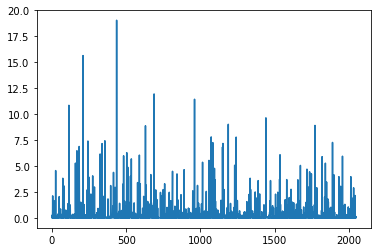

In [59]:
plt.plot([x for x in range(len(eeg_features[0][0]))], eeg_features[0][0])
plt.show()

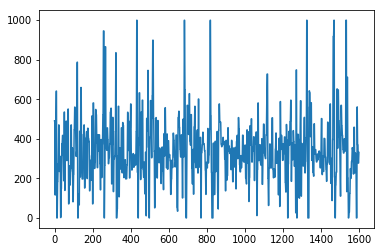

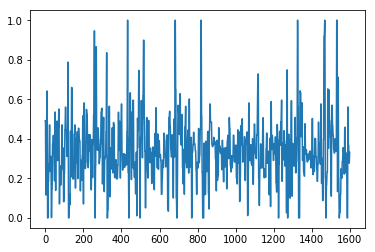

In [23]:
mat = scipy.io.loadmat('./EEG_RawData/Movie_P01/EEG_Clip33.mat')
mat = mat['ThisEEG']
mat = mat[:,-1600:]
#mat.shape
plt.plot([x for x in range(len(mat[0]))], mat[0])
plt.show()

#a = Normalize(mat)
a = Standarize(mat)
plt.plot([x for x in range(len(a[0]))], a[0])
plt.show()

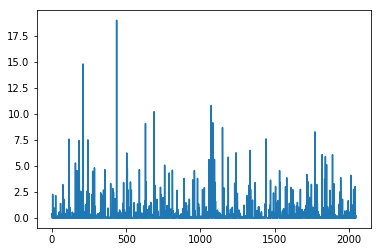

In [25]:
data = np.load('./EEG_ResNet_Features.npz')
features = data['features']
plt.plot([x for x in range(2048)], features[0][0])